# **Multiclass Classification Neural Network on generated dataset**
This notebook is created by Ganesh_9124, CSE with major in AI, IIITDM Kancheepuram.


## **0. Multiclass classification problems:**

* Input : feature vector of sample.
* output : One of the multiple class labels.

In [1]:
# import required libraries

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **1. Make dataset ready**

Using sklearn.datasets.make_blobs to generate dataset.

for more info visit:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [2]:
# dataset preparation

import sklearn.datasets

RANDOM_SEED = 42


X_blob, y_blob = sklearn.datasets.make_blobs(n_samples=1000,
                                             n_features=2,
                                             centers=4,
                                             cluster_std=1.5,
                                             random_state=RANDOM_SEED
                                   )



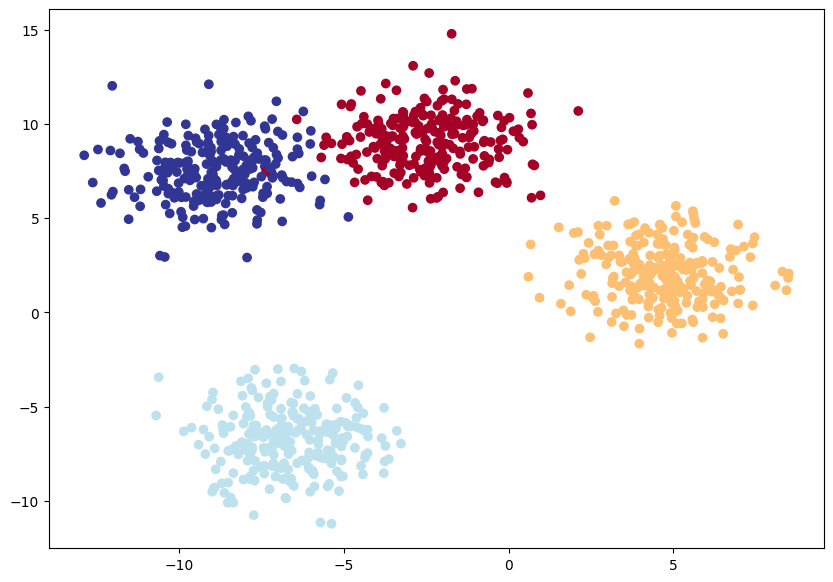

In [3]:
# visualise the dataset
plt.figure(figsize=(10,7))
plt.scatter(x = X_blob[:,0],
            y = X_blob[:,1],
            c = y_blob,
            cmap = plt.cm.RdYlBu);

In [4]:
# convert ndarray to torch tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [5]:
# split the data using train_test_split module
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)

## **2. Build the model**

In [6]:
# setup device
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [7]:
# put data on the target device

X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)


In [8]:
# build the model architecture

class MulticlassBlobModel(nn.Module):
  def __init__(self,
               input_features,
               output_features,
               hidden_units = 8):
    super().__init__()

    self.NetworkStack = nn.Sequential(
        nn.Linear(in_features=input_features,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.NetworkStack(x)

In [9]:
X_blob_train.shape, y_blob_train.shape, y_blob_train.unique()

(torch.Size([800, 2]), torch.Size([800]), tensor([0, 1, 2, 3]))

In [10]:
# instantiate the MulticlassBlobModel class

model_0 = MulticlassBlobModel(input_features=2,
                              output_features=4,
                              hidden_units=10).to(device)

model_0

MulticlassBlobModel(
  (NetworkStack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [11]:
model_0.state_dict()

OrderedDict([('NetworkStack.0.weight',
              tensor([[-4.6211e-02, -2.4200e-01],
                      [-3.2930e-01,  4.6802e-01],
                      [-4.0231e-01,  4.7879e-05],
                      [ 2.8776e-01,  5.9465e-02],
                      [-2.8802e-02,  2.5031e-02],
                      [-4.9838e-01,  2.5674e-01],
                      [-6.2073e-01,  3.4527e-01],
                      [-6.7185e-02,  6.4936e-01],
                      [-1.5243e-01,  4.8231e-01],
                      [ 1.3355e-01, -4.3160e-01]])),
             ('NetworkStack.0.bias',
              tensor([-0.4168,  0.6125, -0.3569, -0.0858, -0.2130, -0.0479, -0.3591, -0.6984,
                       0.2953,  0.5511])),
             ('NetworkStack.2.weight',
              tensor([[ 0.1702,  0.1304, -0.0007, -0.0087, -0.0843,  0.2817,  0.2340,  0.2819,
                        0.2276, -0.1533],
                      [-0.2524, -0.1914, -0.1495, -0.0275,  0.0546, -0.0595,  0.1362, -0.2911,
             

In [12]:
# raw outputs
y_blob_logits = model_0(X_blob_test)
y_blob_logits[:5]

tensor([[ 0.2153, -0.0424, -0.2019, -0.0169],
        [ 0.3905, -2.3282, -1.4980, -0.9288],
        [ 0.4808, -0.2225, -0.6105, -0.4336],
        [ 0.2375,  0.1493, -0.0449, -0.0287],
        [ 0.1771, -1.3658, -0.8187, -0.2252]], grad_fn=<SliceBackward0>)

In [13]:
y_blob_preds = torch.softmax(y_blob_logits, dim = 1)
y_blob_preds[:5], y_blob_test[:5]

(tensor([[0.3101, 0.2397, 0.2043, 0.2459],
         [0.6736, 0.0444, 0.1019, 0.1801],
         [0.4481, 0.2218, 0.1505, 0.1796],
         [0.2911, 0.2665, 0.2194, 0.2230],
         [0.4441, 0.0949, 0.1641, 0.2970]], grad_fn=<SliceBackward0>),
 tensor([1, 3, 2, 1, 0]))

In [14]:
y_blob_preds = torch.argmax(y_blob_preds, dim=1)
y_blob_preds[:5], y_blob_test[:5]

(tensor([0, 0, 0, 0, 0]), tensor([1, 3, 2, 1, 0]))

## **3. Train the model**



### **CrossEntropyLoss:**

* Criterion function computes the cross entropy loss between the input logits and the target.
* Useful for multiclass classification problem.
* The performance of this criterion is generally better when `target` contains class indices, as this allows optimized computation.
* This criterion combines `Softmax` and `NLLLoss` in one single class.

for more info: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [15]:
X_blob_train.type()

'torch.FloatTensor'

In [16]:
# Define accuracy function
def accuracy_fn(y_preds, y_true):
  correct = torch.eq(y_preds, y_true).sum().item()
  acc = (correct / len(y_preds)) * 100
  return acc

In [17]:
# define hyperparameters, loss function and optimizer

epochs = 1000
learning_rate = 0.01

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr = learning_rate)

In [18]:
# training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):
  ### training

  # 1. forward pass
  y_logits = model_0(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate loss
  training_loss = loss_fn(y_logits,
                          y_blob_train)
  training_acc = accuracy_fn(y_preds=y_preds,
                             y_true=y_blob_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  training_loss.backward()

  # 5. optimizer step
  optimizer.step()


  ### testing
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,
                        y_blob_test)
    test_acc = accuracy_fn(y_preds=test_preds,
                           y_true=y_blob_test)

  print(f"Epoch: {epoch} | training loss: {training_loss: .5f} | training accuracy: {training_acc} | test loss: {test_loss: .5f} | test accuracy: {test_acc: .5f}")

Epoch: 0 | training loss:  1.43046 | training accuracy: 25.124999999999996 | test loss:  1.29291 | test accuracy:  24.50000
Epoch: 1 | training loss:  1.28202 | training accuracy: 24.875 | test loss:  1.16531 | test accuracy:  32.00000
Epoch: 2 | training loss:  1.17628 | training accuracy: 28.125 | test loss:  1.07957 | test accuracy:  39.50000
Epoch: 3 | training loss:  1.10720 | training accuracy: 38.5 | test loss:  1.02432 | test accuracy:  41.00000
Epoch: 4 | training loss:  1.06285 | training accuracy: 43.25 | test loss:  0.98082 | test accuracy:  54.50000
Epoch: 5 | training loss:  1.02445 | training accuracy: 55.625 | test loss:  0.93514 | test accuracy:  68.00000
Epoch: 6 | training loss:  0.98047 | training accuracy: 68.375 | test loss:  0.88417 | test accuracy:  71.00000
Epoch: 7 | training loss:  0.92832 | training accuracy: 70.25 | test loss:  0.83075 | test accuracy:  73.50000
Epoch: 8 | training loss:  0.87143 | training accuracy: 71.75 | test loss:  0.77963 | test accur

## **4. Make predictions and visualise the model**



In [19]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repository.

if Path("helper_function.py").is_file():
  print(f"helper_function.py is already exists")

else:
  print(f"Downloading helper_fuctions.py")
  request = requests.get(f"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

In [20]:
from helper_function import plot_decision_boundary

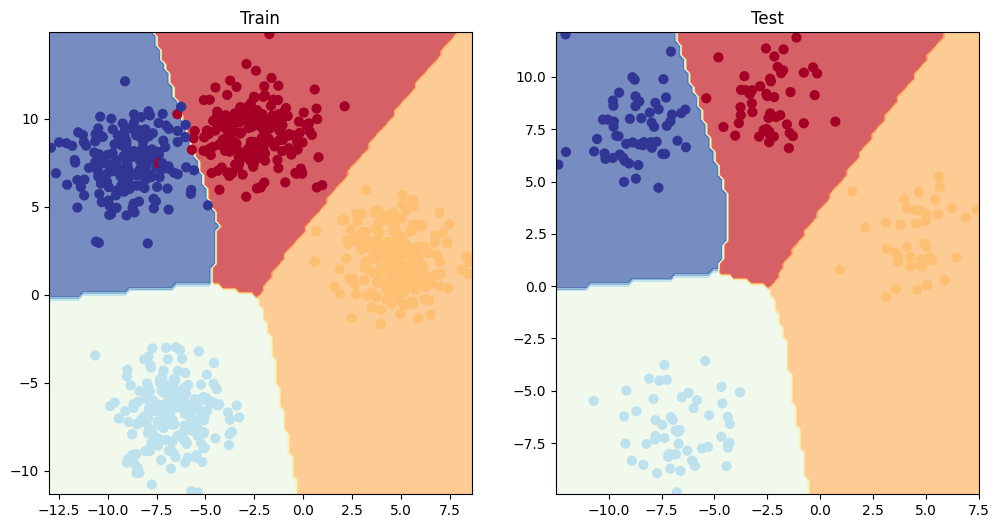

In [21]:
# plot decision boundary of the model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

In [22]:
# make predictions

model_0.eval()
with torch.inference_mode():
  y_blob_preds = model_0(X_blob_test)
  y_blob_preds = torch.softmax(y_blob_preds, dim=1).argmax(dim=1)
y_blob_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

## **5. Classification evaluation metrics**

* Accuarcy
* Precision
* Recall
* F1 score
* Confusion matrix
* Classification report

Article for classification evaluation:
  https://towardsdatascience.com/understanding-classification-metrics-in

torchmetrics:
  https://torchmetrics.readthedocs.io/en/latest/

In [23]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [24]:
from torchmetrics import Accuracy, Precision, Recall, F1Score

In [25]:
# Accuracy

torchmetric_acc = Accuracy(task = "multiclass", num_classes = 4).to(device)

torchmetric_acc(y_blob_preds, y_blob_test)

tensor(1.)

In [26]:
# Precision

torchmetrics_precision = Precision(task = "multiclass", num_classes = 4).to(device)

torchmetrics_precision(y_blob_preds, y_blob_test)

tensor(1.)

In [27]:
# Recall

torchmetrics_recall = Recall(task = "multiclass", num_classes = 4).to(device)

torchmetrics_recall(y_blob_preds, y_blob_test)

tensor(1.)

In [28]:
# F1Score

torchmetrics_f1score = F1Score(task = "multiclass", num_classes = 4).to(device)

torchmetrics_f1score(y_blob_preds, y_blob_test)

tensor(1.)